# Modelos Lineales

Son muy útiles cuando se cuentan con pocos datos y con espacios de características muy grandes.

## Modelos Lineales para Regresión


Todos los modelos lineales aprenden un vector que contiene los coeficientes (**coef_**) y una ordenada en el origen (**intercept_**) que permite hacer predicciones usando una combinación lineal de las variables de entrada:

$$
    y\_pred = x\_test[0] * coef\_[0] + ... + x\_test[n\_features - 1] * coef\_[n\_features - 1] + intercept\_
$$

La diferencia entre modelos lineales para regresión es el tipo de restricciones o penalizaciones en el vector **coef_** como forma de regularización con el fin de intentar aprooximar mejor los datos de entrada. El modelo lineal estándar es la regresión por mínimos cuadrados (**ordinary least squarest regression**), conocida como regresión lineal.

Este modelo no tiene restricciones en **coef_** por lo que cuando se tiene un número de características muy alto, el estimador no funciona correctamente y puede terminar sobreajustandose.

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coef = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60, test_size=140)

print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


### Regresión Lineal

$$
\text{min}_{\mathbf{w}, b} \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2
$$

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"R^2 Train: {lr.score(X_train, y_train)}")
print(f"R^2 Test: {lr.score(X_test, y_test)}")

R^2 Train: 0.8780111193075132
R^2 Test: 0.21633222519002993


In [3]:
import numpy as np
from sklearn.metrics import r2_score

print(r2_score(np.dot(X, true_coef), y))

0.5985284495875146


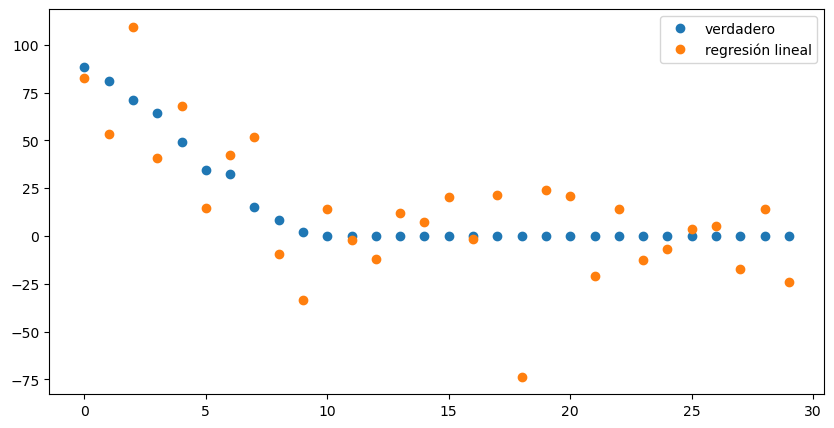

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coef)[::-1] # lista[::-1] sirve para darle la vuelta a lista
plt.plot(true_coef[coefficient_sorting], "o", label="verdadero")
plt.plot(lr.coef_[coefficient_sorting], "o", label="regresión lineal")

plt.legend()

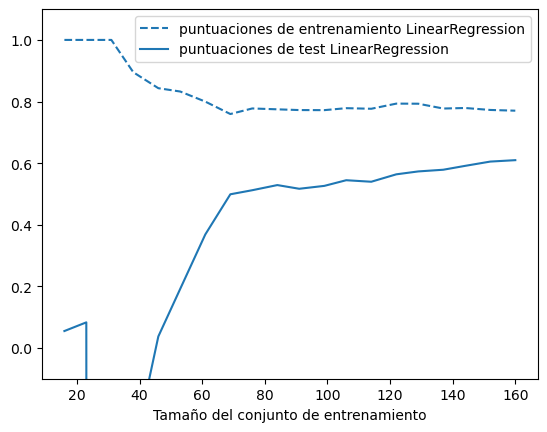

In [5]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="puntuaciones de entrenamiento " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="puntuaciones de test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)

### Regresión de Cresta - Ridge Regression
#### Penalización L2

**Ridge**: Es una regularización simple (L2) para el modelo LinearRegression. Tiene el beneficio de no ser más costoso computacionalmente que la estimación usando mínimos cuadrados.

$$
\text{min}_{\mathbf{w},b}  \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_2^2
$$

La cantidad de regularización se ajusta a través del parámetro **alpha** del modelo Ridge.

In [6]:
from sklearn.linear_model import Ridge

ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

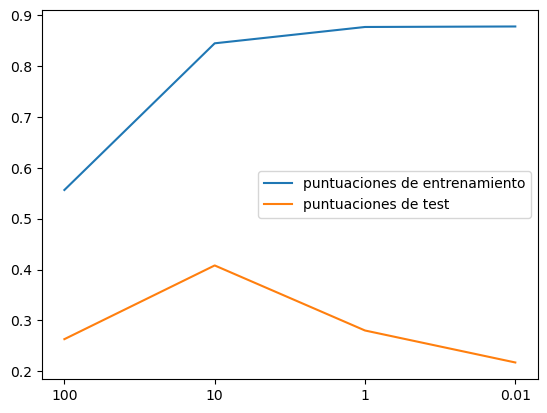

In [7]:
plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

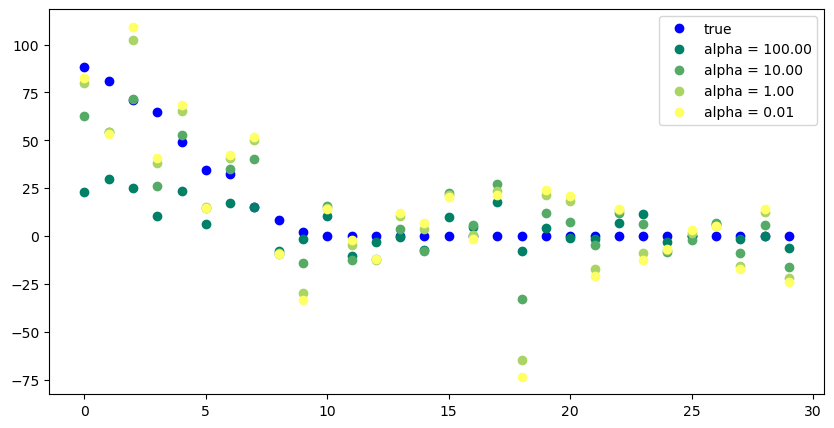

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(true_coef[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

Austar **alpha** es muy importante para el rendimiento del modelo.

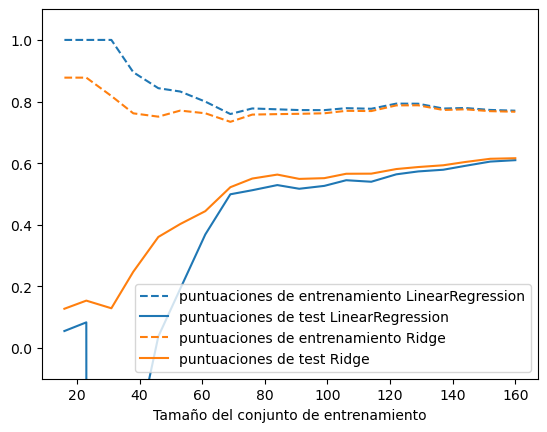

In [9]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

### Lasso (L1)

**Lasso**: Es útil para conseguir imponer dispersión en los coeficientes. Esta penalización suele usarse cuando se cree que muchas de las características no son relevantes.

$$
\text{min}_{\mathbf{w}, b} \sum_i \frac{1}{2} || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_1
$$

In [10]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso

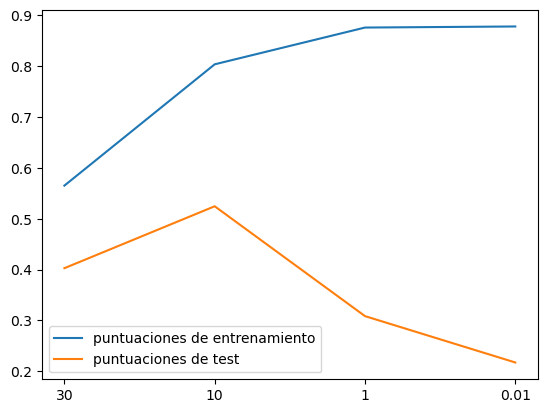

In [11]:
plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

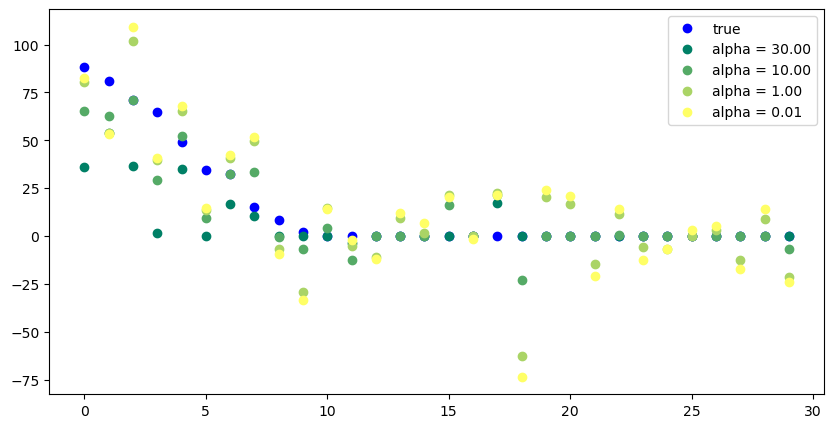

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(true_coef[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

C:\Users\aleja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.054e+01, tolerance: 4.958e+01
  model = cd_fast.enet_coordinate_descent(


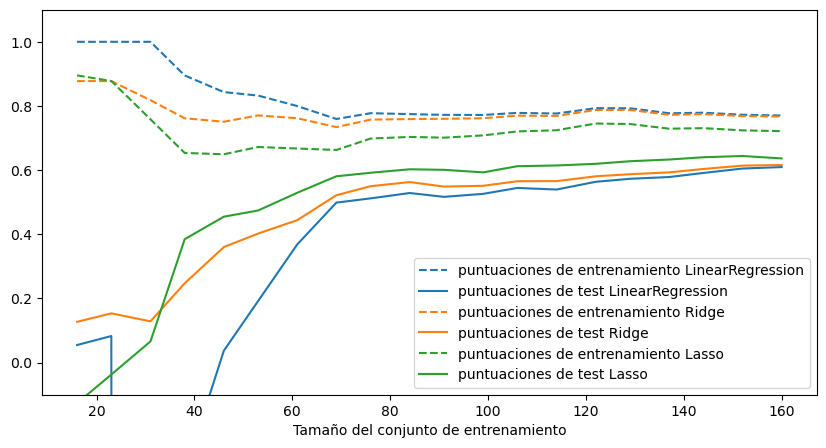

In [13]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

<div class="alert alert-success">
    En lugar de escoger <b>Ridge</b> o <b>Lasso</b>, puede utilizar <b>ElasticNet</b>, que considera ambas formas de regularización y proporciona un parámetro para sopesarlas. ElasticNet suele comportarse como el mejor de los dos modelos.
</div>

[ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

## Modelos Lineales para Clasificación

Los modelos lineales para clasificación aprenden un vector de coeficientes (**coef_**) y un valore umbral (**intercep_**) para poder hacer las predicciones mediante una combinación lineal de las características:

$$
y\_pred = x\_test[0] * coef\_[0] + ... + x\_test[n\_features-1] * coef\_[n\_features-1] + intercept\_ > 0
$$

Muy similar al caso de la regresión.

La diferencia entre los modelos lineales de clasificación es el tipo de regularización que imponen en **coef_** y en **intercep_** junto con unas diferencias menores en como se mide la bondad de ajuste respecto al conjunto de entrenamiento (también conocida como función de perdida).

Los estimadores más comunes para clasificación son **SVM Lineal** implementada como **LinearSVC** y la regresión logística **LogisticRegression**.

### El hiperparámetro C en LinearSVC

El hiperparámetro $C$ de **LinearSVC** controla la regularización que sufre el modelo.

Valores bajos de $C$ llevan a más regularización y a modelos más simples (se permiten más errores), mientras que valores altos de $C$ llevan a menos regularización y a modelos más forzados a intentar clasificar todo correctamente.

Puede ajustarse el hiperparámetro **penalty** con los valores 'l1' o 'l2'. Con el primero se forza dispersión en los coeficientes (Similar a Lasso), mientras que con el segundo se forza a coeficientes más pequeños (Similar a Ridge).

### Clasificación Multi-Clase Lineal

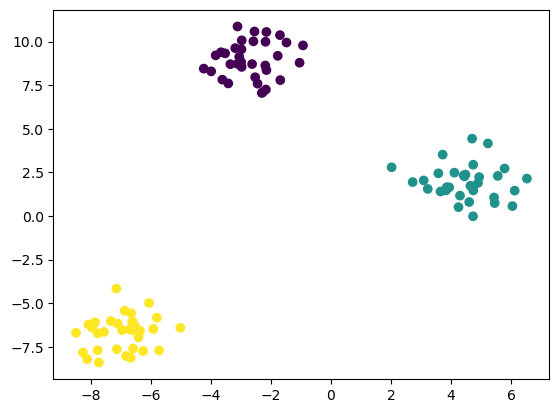

In [14]:
from sklearn.datasets import make_blobs

plt.figure()

X, y = make_blobs(random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=(y / 2.));

In [15]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC()
linear_svm.fit(X, y)

print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


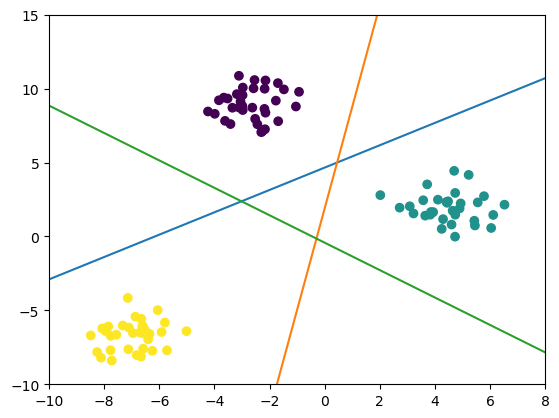

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=(y / 2.))
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8);